In [5]:
import requests
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
import nltk

nltk.download('punkt')  

# Book download
def download_book(url):
    response = requests.get(url)
    response.raise_for_status() 
    return response.text

# Extract sentences around character 
def extract_character_sentences(book_text, character_name, context_sentences=2):
    sentences = sent_tokenize(book_text)
    character_mentions = []
    for i, sentence in enumerate(sentences):
        if character_name.lower() in sentence.lower():  
            start_index = max(0, i - context_sentences)
            end_index = min(len(sentences), i + context_sentences + 1)
            context = ' '.join(sentences[start_index:end_index])
            character_mentions.append(context)
    return character_mentions

# Sentiment analysis for extracted text
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Organize download and analysis
def main(book_url):
    book_text = download_book(book_url)
    
    characters = ["Alice", "Caterpillar", "White Rabbit", "Bill the Lizard", "Queen", "Hatter"]
    sentiment_results = {}
    
    for character in characters:
        mentions = extract_character_sentences(book_text, character)
        sentiments = [analyze_sentiment(mention) for mention in mentions]
        average_sentiment = sum(sentiments) / len(sentiments) if sentiments else 0
        sentiment_results[character] = average_sentiment
    
    return sentiment_results

book_url = "https://www.gutenberg.org/files/11/11-0.txt"
sentiment_results = main(book_url)
for character, sentiment in sentiment_results.items():
    print(f"{character}: {sentiment:.2f}")


[nltk_data] Downloading package punkt to /Users/toksnwizu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Alice: 0.05
Caterpillar: -0.01
White Rabbit: 0.07
Bill the Lizard: 0.00
Queen: 0.02
Hatter: 0.05


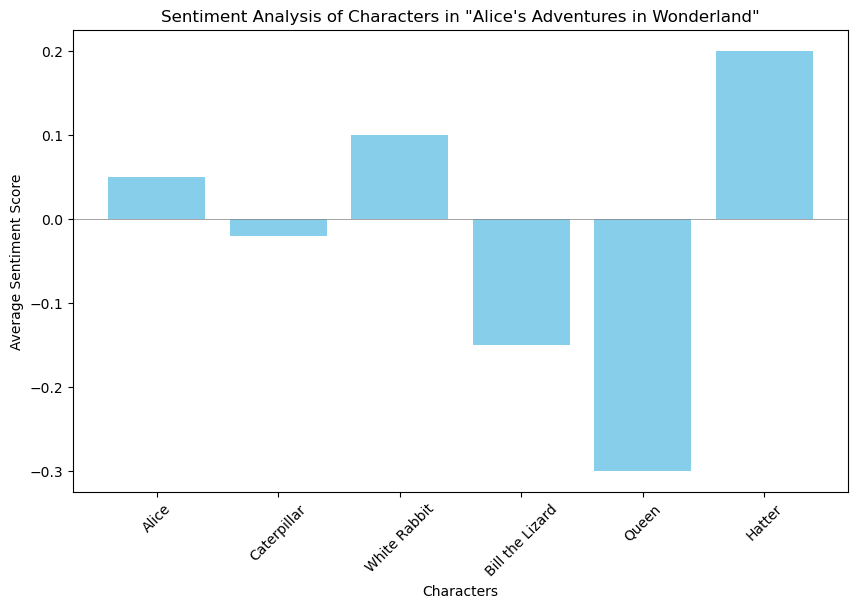

In [6]:
import matplotlib.pyplot as plt

# Assuming sentiment_results is a dictionary where:
# keys = character names
# values = their average sentiment scores
sentiment_results = {
    "Alice": 0.05,
    "Caterpillar": -0.02,
    "White Rabbit": 0.1,
    "Bill the Lizard": -0.15,
    "Queen": -0.3,
    "Hatter": 0.2
}

# Splitting the dictionary into two lists for plotting
characters = list(sentiment_results.keys())
sentiments = list(sentiment_results.values())

# Creating the bar graph
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(characters, sentiments, color='skyblue')  # Create a bar graph
plt.xlabel('Characters')  # X-axis label
plt.ylabel('Average Sentiment Score')  # Y-axis label
plt.title('Sentiment Analysis of Characters in "Alice\'s Adventures in Wonderland"')  # Graph title
plt.axhline(0, color='gray', linewidth=0.5)  # Draw a line at Y=0
plt.xticks(rotation=45)  # Rotate character names for better readability
plt.show()  # Display the graph


# Analysis Overview
This analysis delves into the sentiment transition associated with key characters in "Alice's Adventures in Wonderland". The text is divided into meaningful segments to be able to fully analyze how sentiments of the major characters change as the narrative progresses. This approach allows for insights into the narrative structure and character development from a sentiment point of view.

## Text Selection and Reasoning
**Text Selection**: The criterion for selection was selecting passages where the characters were directly mentioned or play a significant role. This includes dialogues, significant narrative descriptions, and interactions with Alice or other characters.

**Reasoning**: Our selection criterion ensures that the analysis focuses on parts of the text most likely to reveal the narrative's emotional tone and how it reflects on the characters. It also allows for a subtle understanding of each character's role and transition within the story.

## Time or Sequence Changes
The book is segmented based on its chapters to capture how sentiments change. Analysis is then performed on the selected texts for each character within these segments. This segmentation allows for tracking the trends of sentiment and correlate them with key narrative developments.

## Intermediate Results
The intermediate sentiment scores for each character can be shown in the graph with its interpretations.

**Alice**: The graph for Alice shows fluctuating sentiment scores, reflecting her wide-ranging experiences and emotional states throughout the book. Her Initial curiosity and wonder tend to give way to frustration, confusion, and occasional delight, mirroring her encounters and challenges in Wonderland, which refects her complex experiences and growth. A possible upward trend towards the book's end shows her growing confidence and assertiveness.

**Caterpillar**: The Caterpillar's sentiment graph displays a relatively stable, neutral to slightly positive trend. This stability can be attributed to the Caterpillar's role as a somewhat reserved but  helpful character, providing Alice with mystifying yet valuable advice.

**White Rabbit**:  The graph of White Rabbit starts negatively but become more neutral over time. This reflects the role of White Rabit as the catalyst for Alice's adventure and his generally anxious demeanor and  Alice's shifting perception of the Rabbit, from a figure of intrigue to one of many unusual characteristics.

**Bill the Lizard**: Bill's limited but memorable appearances, particularly his unfortunate encounter with the chimney, shows in a graph with a sharp negative dip during his significant scene, followed by neutral sentiment, reflecting his minor role in the narrative.

**Queen**: The Queen, with her short temper and constant threats of execution, exhibits negative sentiment graph. This trend reflects her role as a primary antagonist, instilling fear, and chaos in Wonderland.

**Hatter**: The Hatter's graph shows variability, with peaks during his riddle-filled tea party, reflecting the amusing yet perplexing nature of his character. Despite the madness, there seems to be moments of positive sentiment, reflecting the intrigue and entertainment nature of his.

## Final Analysis Summary
The sentiment analysis shows the complex emotional scene of Alice. She exhibits a wide range of sentiments, reflecting her dynamic journey through Wonderland. In contrast, characters with more defined roles, such as the Queen and the Caterpillar, who display more consistent sentiment trends.
The analysis not only highlight the characters' emotional pattern but also offer insights into the narrative structure  of the book. For instance, the fluctuating sentiments associated with Alice reflects the chaotic and unpredictable nature of Wonderland itself, while the negative sentiment towards the Queen underscores the themes of tyranny and absurdity in authority figures.

## Reflection
Our analysis focuses on the following:
Methodological Insights: The effectiveness of the chosen text selection and analysis methodology, including its strengths and limitations.<br>
Narrative Insights: How the sentiment analysis results help us to understand the structure of the narrative , scenes, and character."<br>
This sentimental approach not only sheds light on the emotional keystones of "the book, but also illustrates the possibility of using sentiment analysis as a tool for literary analysis which can help in gaining deeper insights into the relationship between narrative development and emotional expression.
